In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


In [2]:
wine=load_wine()

In [3]:
features=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['target'])

In [4]:
data=pd.concat([features,target],axis=1)

In [5]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
correlation=data.corr('pearson')

In [7]:
correlation['target'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
target                          1.000000
Name: target, dtype: float64

In [8]:
features=(features-features.min())/(features.max()-features.min())

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3)

In [10]:
f1='flavanoids'
f2='od280/od315_of_diluted_wines'
f3='total_phenols'

basex=np.array(xtrain[[f1,f2,f3]])
basey=np.array(ytrain['target'])

testx=np.array(xtest[[f1,f2,f3]])
testy=np.array(ytest['target'])

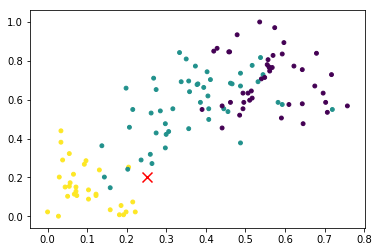

In [17]:
x=pd.DataFrame(basex)
y=basey

plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [11]:
def euclidean_distance(train_point,test_point):
    distance=np.sum((train_point-test_point)**2)
    
    return np.sqrt(distance)

In [12]:
def calc_distance_from_all(all_points,given_point,predictions):
    all_distances=[]
    
    for i,each in enumerate(all_points):
        distance=euclidean_distance(each,given_point)
#         print(predictions([i]))
        all_distances.append((distance,int(predictions[i])))
        
    all_distances.sort(key=lambda tup: tup[0])
    
    return all_distances

In [13]:
def get_neighbours(distances,count):
    return distances[:count]

In [14]:
def predict(all_points, given_point,predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours=get_neighbours(distances,4)
    
    op=[row[-1] for row in neighbours]#op is output variable.
    prediction=max(set(op),key=op.count)
    
    return prediction

In [15]:
def accuracy(basex,basey,testx,testy):
    correct=0
    for i in range(len(testx)):
        p=predict(basex,testx[i],basey)
        
        if p == testy[i]:
            correct+=1
    return f"Accuracy:{correct*100/len(testy)}"

In [16]:
accuracy(basex,basey,testx,testy)

'Accuracy:81.48148148148148'